In [1]:
# anaconda libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
import sklearn.feature_extraction
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
# reading in the dataset
dset = pd.read_csv("project2_igonzal.csv")

In [3]:
dset.head()

,artist name,song title,year,lyrics url,LYRICS
0,Gaël Faye,Kerozen,2020,../lyrics/gaelfaye/kerozen.html,"voce dizia que era amor, bobo foi quem acredit..."
1,Gaël Faye,Solstice,2017,../lyrics/gaelfaye/solstice.html,"faco tudo pra gente ficar de boa, mas voce ins..."
2,Gaël Faye,Histoire D'amour,2020,../lyrics/gaelfaye/histoiredamour.html,"amor, perdemos tanto tempo com as discucoes, f..."
3,GAAB,Um Brinde A Nós Dois,2016,../lyrics/gaab/umbrindeansdois.html,", voce fala que nao, mas seus olhos dizem sim,..."
4,GAAB,Cuidado,2017,../lyrics/gaab/cuidado.html,"olha, pensando bem, eu quero te conhecer, seu ..."


In [4]:
#creating a word count column to extract the number of the words in each article
dset['word_count'] = dset['LYRICS'].apply(lambda x: len(str(x).split(" ")))
dset.head()

,artist name,song title,year,lyrics url,LYRICS,word_count
0,Gaël Faye,Kerozen,2020,../lyrics/gaelfaye/kerozen.html,"voce dizia que era amor, bobo foi quem acredit...",404
1,Gaël Faye,Solstice,2017,../lyrics/gaelfaye/solstice.html,"faco tudo pra gente ficar de boa, mas voce ins...",334
2,Gaël Faye,Histoire D'amour,2020,../lyrics/gaelfaye/histoiredamour.html,"amor, perdemos tanto tempo com as discucoes, f...",128
3,GAAB,Um Brinde A Nós Dois,2016,../lyrics/gaab/umbrindeansdois.html,", voce fala que nao, mas seus olhos dizem sim,...",364
4,GAAB,Cuidado,2017,../lyrics/gaab/cuidado.html,"olha, pensando bem, eu quero te conhecer, seu ...",87


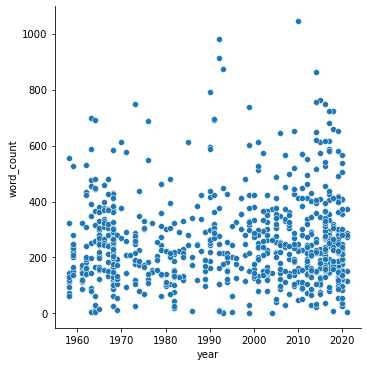

In [22]:
# creates a relplot using year and word count
plt1= sns.relplot(data=dset, x='year', y= 'word_count')
plt.savefig('project2_fig1_igonzal.pdf')

In [6]:
# storing the word counts data into a variable
word_count= dset['word_count']

In [7]:
# converts word counts into an array and applys the min max scaler to nromalize
array_word_count= np.array(word_count)
array_word_count= np.reshape(array_word_count, (-1,1))
sc= MinMaxScaler()
songs_scaled = sc.fit_transform(array_word_count)


In [8]:
# Calculates the coefficent
year= np.array(dset['year'].values)
year= np.reshape(year, (-1, 1))
lr= LinearRegression()
fit= lr.fit(year, songs_scaled)
fit.coef_

array([[0.00050957]])

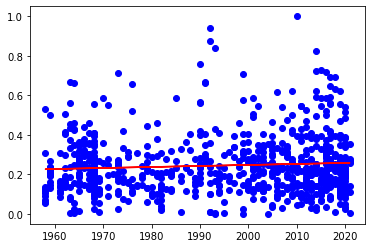

In [9]:
# creates the linear regression for the year and minmax-scaled version of song length
pred1= lr.predict(year)
plt.plot(year, pred1, color='red')
plt.scatter(year, songs_scaled, color='blue')


In [10]:
#extracts the number of the words in each article and stores it into a list
unique_w =[]
for x in dset['LYRICS'].values:
    u = re.findall(r'\w+',x)
    a=set(u)
    counts=len(a)
    unique_w.append(counts)

In [11]:
# creates a new column for the unique word count
dset['Unique_length']= unique_w

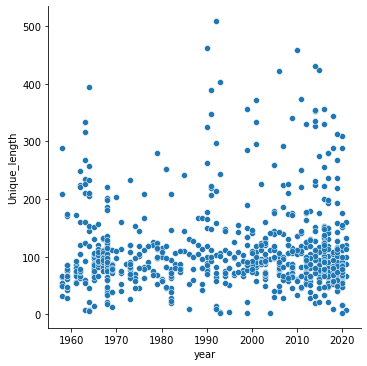

In [23]:
# creates a relplot using year and unique words
sns.relplot(data=dset, x='year', y= 'Unique_length')
plt.savefig('project2_fig2_igonzal.pdf')

In [13]:
# converts the unique word counts into an array and applys the min max scaler to nromalize
array_unique_count= np.array(unique_w)
array_unique_count= np.reshape(array_unique_count, (-1,1))
sc2= MinMaxScaler()
unique_s = sc2.fit_transform(array_unique_count)


In [14]:
# Calculates the coefficent
year2= np.array(dset['year'].values)
year2= np.reshape(year2, (-1, 1))
lr= LinearRegression()
fit2= lr.fit(year, unique_s)
pred2= fit2.predict(year2)
fit2.coef_

array([[0.00042084]])

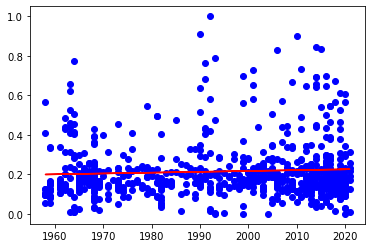

In [15]:
# creates the linear regression for the year and minmax-scaled version of unique length
plt.plot(year, pred2, color='red')
plt.scatter(year, unique_s, color='blue')


<h2>Part 3</h2>

In [16]:
# creating a variable that will hold the calcualted ratio of unique words
ratio = [int(x)/int(y) for x,y in zip(unique_w, word_count)]

In [17]:
# creates a ratio column within the dataset
dset['Ratio'] = ratio

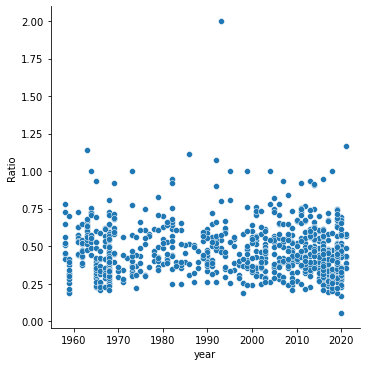

In [24]:
# creates a relplot using year and the ratio
sns.relplot(data=dset, x='year', y="Ratio")
plt.savefig('project2_fig3_igonzal.pdf')

In [19]:
# converts the ratio into an array and applys the min max scaler to nromalize
array_ratios= np.array(ratio)
array_ratios= np.reshape(array_ratios, (-1,1))
sc3=MinMaxScaler()
new_ratio= sc3.fit_transform(array_ratios)

In [20]:
# Calculates the coefficent
year3= np.array(dset['year'].values)
year3= np.reshape(year3, (-1, 1))
lr= LinearRegression()
fit3= lr.fit(year3, new_ratio)
pred3= fit3.predict(year)
fit3.coef_

array([[-0.00012043]])

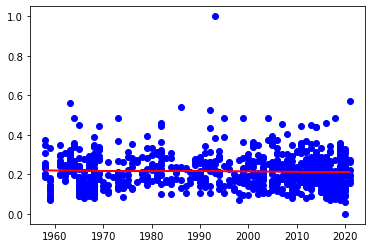

In [21]:
# creates the linear regression for the year and minmax-scaled version of the unique ratio
plt.plot(year, pred3, color='red')
plt.scatter(year, new_ratio, color='blue')
